## Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet
from scipy.spatial.distance import pdist

## Loading Dataset

In [58]:
df=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\unsupervised learning\winequalityN.csv")

In [59]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [60]:
df=df.iloc[:,1:]

## Removing duplicate data

In [61]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
39,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [62]:
df.drop_duplicates(inplace=True,ignore_index=True)

## Descriptive Statistics

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5317.0,7.216917,1.319299,3.80000,6.4000,7.00000,7.700000,15.90000
volatile acidity,5319.0,0.344164,0.168244,0.08000,0.2300,0.30000,0.410000,1.58000
citric acid,5324.0,0.318766,0.147135,0.00000,0.2400,0.31000,0.400000,1.66000
residual sugar,5325.0,5.054967,4.504470,0.60000,1.8000,2.70000,7.500000,65.80000
chlorides,5325.0,0.056679,0.036846,0.00900,0.0380,0.04700,0.066000,0.61100
free sulfur dioxide,5327.0,30.053970,17.814922,1.00000,16.0000,28.00000,41.000000,289.00000
total sulfur dioxide,5327.0,114.188098,56.791033,6.00000,75.0000,116.00000,154.000000,440.00000
density,5327.0,0.994537,0.002966,0.98711,0.9922,0.99466,0.996775,1.03898
pH,5318.0,3.224410,0.160299,2.72000,3.1100,3.21000,3.330000,4.01000
sulphates,5323.0,0.533312,0.149734,0.22000,0.4300,0.51000,0.600000,2.00000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5327 entries, 0 to 5326
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5317 non-null   float64
 1   volatile acidity      5319 non-null   float64
 2   citric acid           5324 non-null   float64
 3   residual sugar        5325 non-null   float64
 4   chlorides             5325 non-null   float64
 5   free sulfur dioxide   5327 non-null   float64
 6   total sulfur dioxide  5327 non-null   float64
 7   density               5327 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5323 non-null   float64
 10  alcohol               5327 non-null   float64
 11  quality               5327 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 499.5 KB


In [65]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## Univariate Analysis

In [66]:
num_col=df.select_dtypes(include=np.number).columns
print(num_col.drop('quality'))

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [67]:
cat_col=['quality']

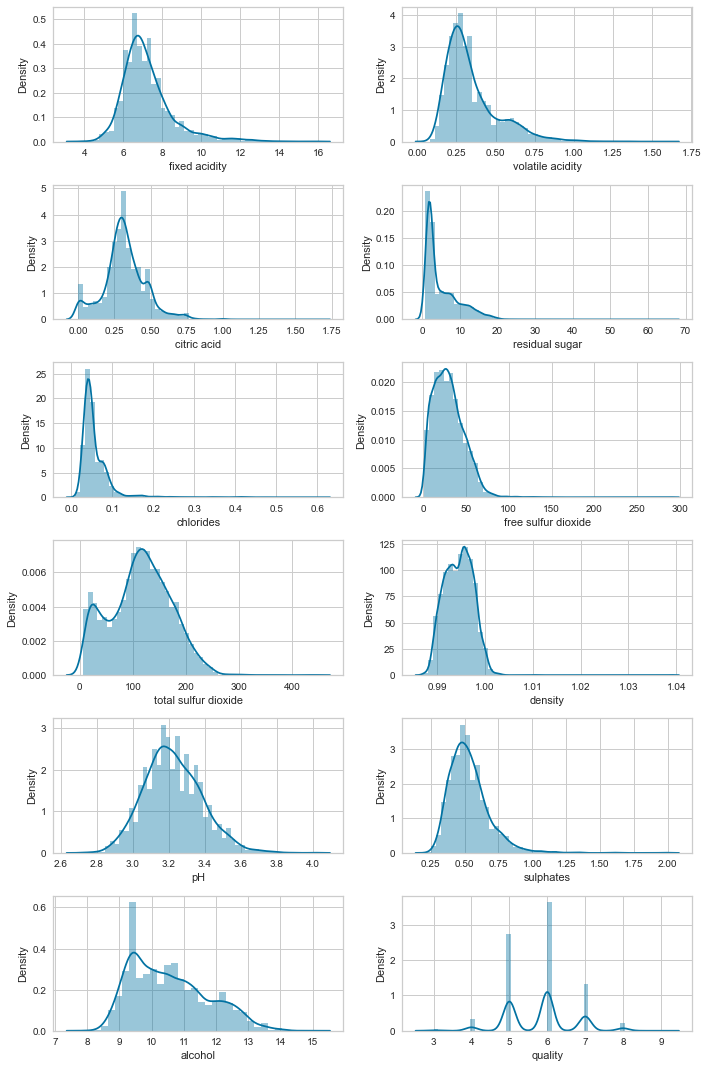

In [68]:
t=1
plt.figure(figsize=[10,15])
for i in num_col:
    plt.subplot(6,2,t)
    sns.distplot(df[i])
    t=t+1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

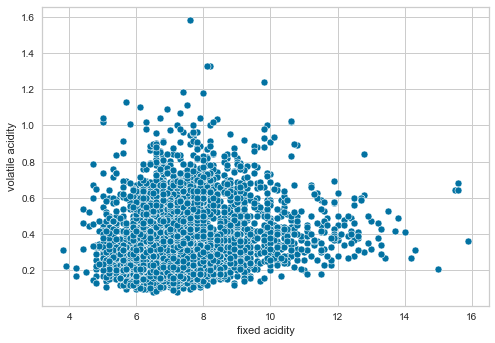

In [69]:
sns.scatterplot(df['fixed acidity'],df['volatile acidity'])

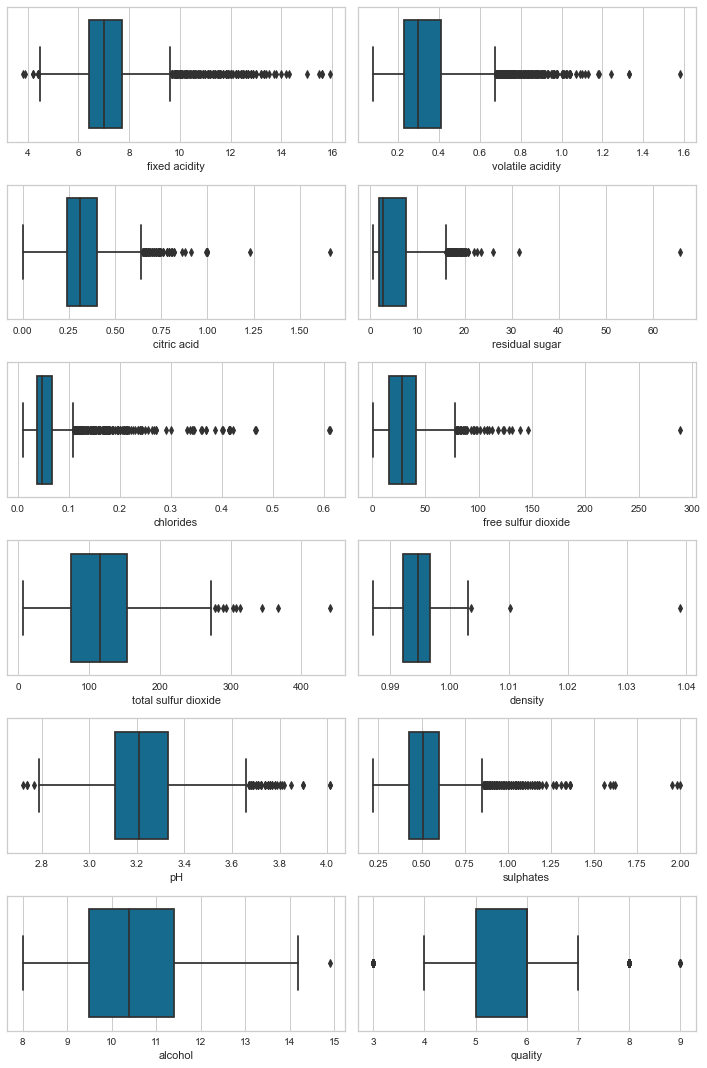

In [70]:
t=1
plt.figure(figsize=[10,15])
for i in num_col:
    plt.subplot(6,2,t)
    sns.boxplot(df[i])
    t=t+1
plt.tight_layout()
plt.show()

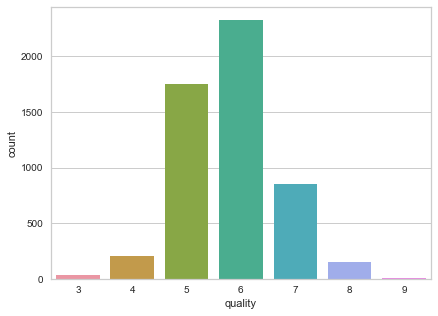

In [71]:
t=1
plt.figure(figsize=[15,5])
for i in cat_col:
    plt.subplot(1,2,t)
    sns.countplot(df[i])
    t=t+1
plt.show()

## Missing Value Treatment

In [72]:
df.dropna(inplace=True)

In [73]:
df.shape

(5293, 12)

## Encoding and scaling

In [74]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in df.columns:
    df.loc[:,i]=ss.fit_transform(pd.DataFrame(df.loc[:,i]))

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.165336,-0.440224,0.279982,3.476769,-0.317091,0.839246,0.984004,2.177072,-1.400820,-0.555529,-1.475099,0.231903
1,-0.695369,-0.261904,0.144036,-0.767031,-0.208687,-0.899905,0.314890,-0.180915,0.472264,-0.288588,-0.885105,0.231903
2,0.667574,-0.380784,0.551874,0.410568,-0.181586,-0.002279,-0.301400,0.189625,0.222519,-0.622264,-0.379396,0.231903
3,-0.013898,-0.677983,0.008090,0.766070,0.035222,0.951449,1.265736,0.358053,-0.214534,-0.889204,-0.547965,0.231903
4,-0.771089,-0.143024,-1.079477,0.432787,-0.317091,-0.002279,0.385323,0.122254,-0.276970,-0.422058,-0.800820,0.231903


<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

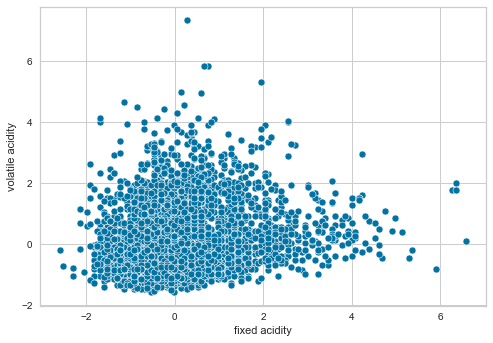

In [76]:
sns.scatterplot(df['fixed acidity'],df['volatile acidity'])

## Outliers Treatment

In [80]:
df1=df.copy()
for i in df1.columns:
    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr=q3-q1
    ul=q3+1.5*iqr
    ll=q1-1.5*iqr
    df1.loc[df1[i]>ul,i]=ul
    df1.loc[df1[i]<ll,i]=ll

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

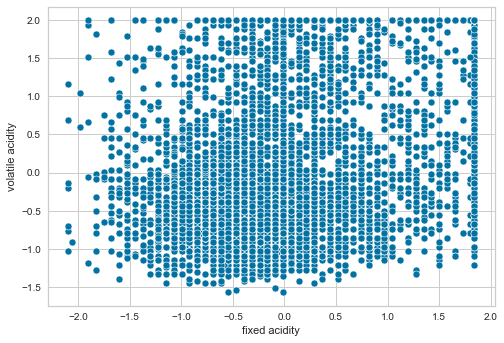

In [83]:
sns.scatterplot(df1['fixed acidity'],df1['volatile acidity'])

## Applying K Means Clustering

In [19]:
## Finding Optimal value of K using Elbow plot

In [20]:
#!pip install --upgrade threadpoolctl
#!pip show threadpoolctl

In [89]:
# within cluster sum of squared - it is distance between cluster centroid and datapoints of that cluster.
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(df)
    wcss.append(model.inertia_)

In [90]:
wcss

[63516.00000000005,
 51013.04861187353,
 42505.49922778933,
 38242.12020361658,
 35467.30084700312,
 33934.087157960326,
 31985.98438368311,
 30926.537364095035,
 29935.604200766225]

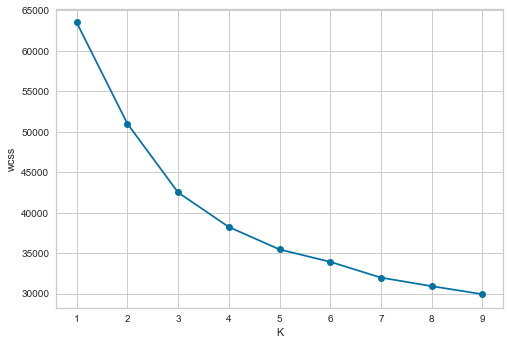

In [92]:
plt.plot(range(1,10),wcss,marker='o')
plt.xlabel('K')
plt.ylabel('wcss')
plt.show()

In [24]:
## Appropriate number of clusters appears to be 4 from above graph

In [25]:
ss=[]
for i in range(2,10):
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(df)
    ss.append(silhouette_score(df,pred))

In [27]:
pd.DataFrame({'n_clus':list(range(2,10)),'Sil_Score':ss})

,n_clus,Sil_Score
0,2,0.250338
1,3,0.212082
2,4,0.227401
3,5,0.171855
4,6,0.178411
5,7,0.170998
6,8,0.150693
7,9,0.132769


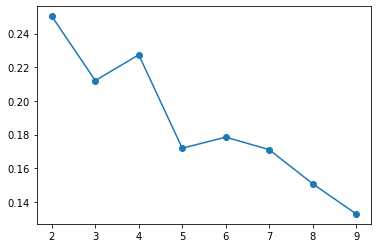

In [28]:
plt.plot(range(2,10),ss,marker='o')

In [ ]:
# but silhoutee score is highest for 2 clusters

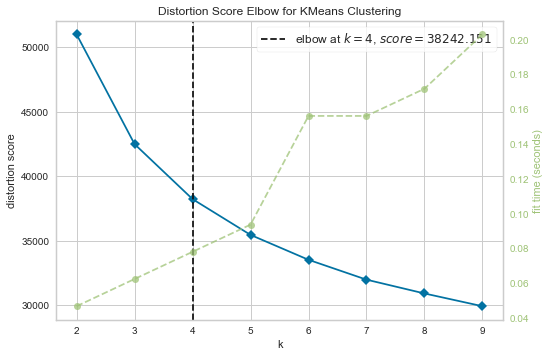

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
k_viz=KElbowVisualizer(KMeans(),k=9)
k_viz.fit(df)
k_viz.show()

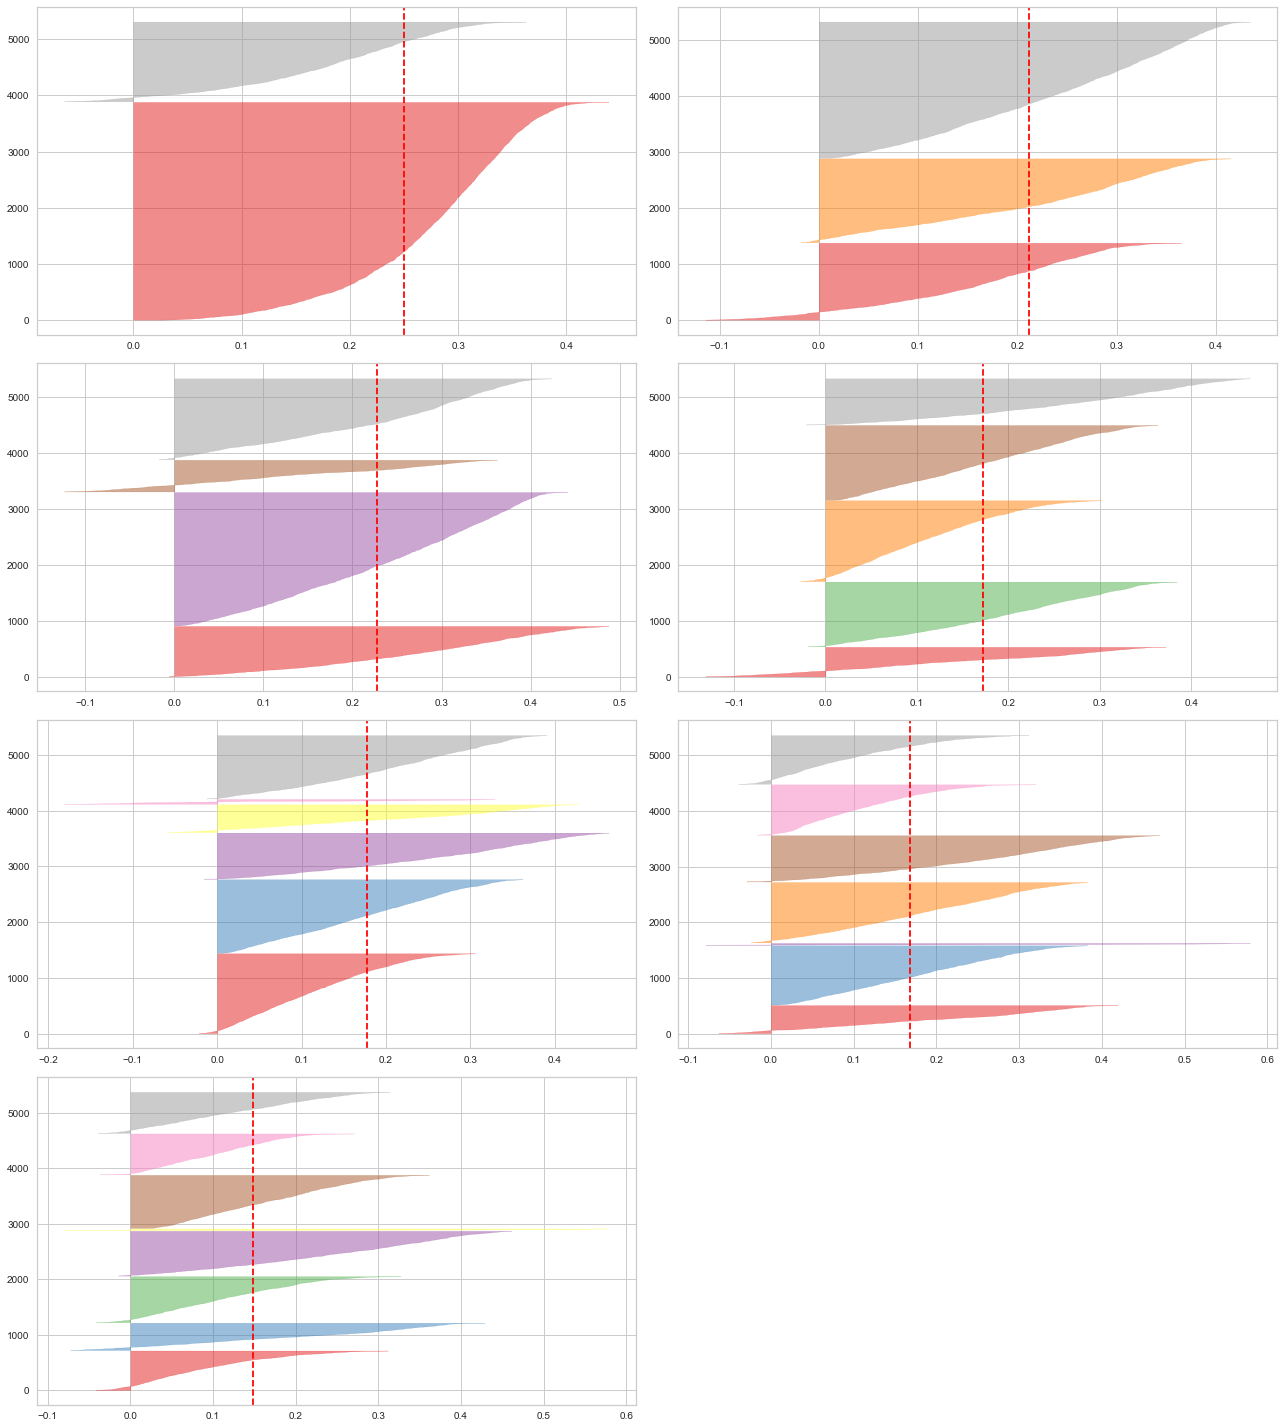

In [30]:
t=1
plt.figure(figsize=(18,20))
for i in range(2,9):
    plt.subplot(4,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(estimator=model)
    sil_viz.fit(df)
    t=t+1
plt.tight_layout()
plt.show()

In [31]:
#findings--

# 1) 4 clusters from elbow plot
# 2) 2 clutsers on the basis of silhoutee score
# 3) 4 clusters on the basis of yellow brick plot (elbow plot)

In [98]:
model=KMeans(n_clusters=2)
label_km=model.fit_predict(df)
centroids=model.cluster_centers_

In [99]:
df['label_km']=label_km

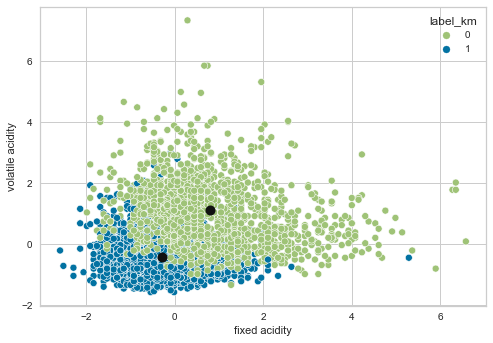

In [102]:
sns.scatterplot(df['fixed acidity'],df['volatile acidity'],hue=df['label_km'],palette=['g','b'])
plt.plot(centroids[0][0],centroids[0][1],marker='o',color='k',ms=10)
plt.plot(centroids[1][0],centroids[1][1],marker='o',color='k',ms=10)

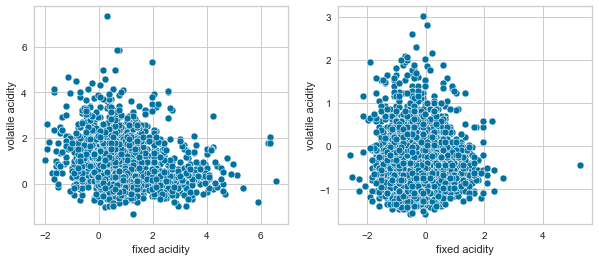

In [116]:
t=1
i=0
plt.figure(figsize=[10,4])
for j in ['green','orange']:
    plt.subplot(1,2,t)
    sns.scatterplot(x='fixed acidity',y='volatile acidity',data=df.loc[df.label_km==i],palette=[j])
    t=t+1
    i=i+1
plt.show()

In [125]:
ss_km=silhouette_score(df.drop('label_km',axis=1),label_km)
ss_km

0.25033807044051015

## Applying Agglomerative Clustering

In [121]:
dend_dist=linkage(df,method='ward')
eucld_dist=pdist(df)

In [122]:
cophenet(dend_dist,eucld_dist)

(0.5098522322985175,
 array([125.22484665, 125.22484665,  37.83938015, ...,   1.58916161,
         82.99003973,  82.99003973]))

In [123]:
cophenet_coeff=cophenet(dend_dist,eucld_dist)[0]
cophenet_coeff

0.5098522322985175

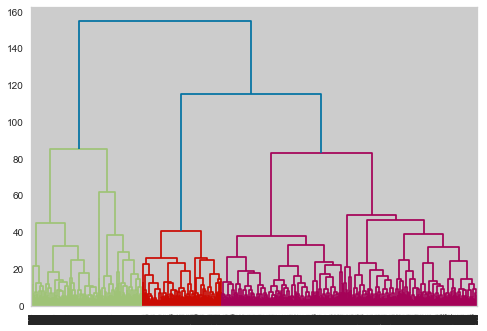

In [35]:
dend=dendrogram(dend_dist)

In [36]:
## optimal number of clusters are 2 (total colors -1)

In [131]:
model=AgglomerativeClustering(n_clusters=2)
label_ag=model.fit_predict(df)
ss_ag=silhouette_score(df.drop('label_km',axis=1),label_ag)

In [132]:
print(ss_ag,ss_km)

0.24097087910810558 0.25033807044051015


## Applying Density based clustering

In [133]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

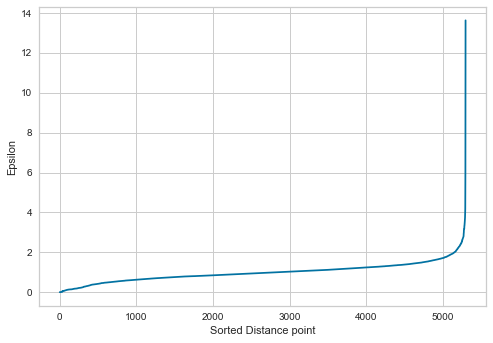

In [136]:
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(df.drop('label_km',axis=1))
distance,index = neigh.kneighbors(df.drop('label_km',axis=1))
distance = np.sort(distance,axis=0)

plt.plot(distance[:,1])
plt.ylabel('Epsilon')
plt.xlabel('Sorted Distance point')
plt.show()

In [146]:
sil_score = []
for i in range(2,25):
    model = DBSCAN(eps=2,min_samples=i)
    pred = model.fit_predict(df.drop('label_km',axis=1))
    sil_score.append(silhouette_score(df.drop('label_km',axis=1),pred))

In [148]:
for i in range(len(sil_score)):
    print('Epsilon: ',2,'\tMin Sample: ',i ,'Silhoute score: ',sil_score[i])

Epsilon:  2 	Min Sample:  0 Silhoute score:  -0.16205878296838788
Epsilon:  2 	Min Sample:  1 Silhoute score:  0.12866643262865093
Epsilon:  2 	Min Sample:  2 Silhoute score:  0.12750568033804233
Epsilon:  2 	Min Sample:  3 Silhoute score:  0.18931329097239835
Epsilon:  2 	Min Sample:  4 Silhoute score:  0.23025386221123612
Epsilon:  2 	Min Sample:  5 Silhoute score:  0.33272606451263403
Epsilon:  2 	Min Sample:  6 Silhoute score:  0.3293014594828784
Epsilon:  2 	Min Sample:  7 Silhoute score:  0.32547696637324364
Epsilon:  2 	Min Sample:  8 Silhoute score:  0.3223066100984211
Epsilon:  2 	Min Sample:  9 Silhoute score:  0.31809465252589514
Epsilon:  2 	Min Sample:  10 Silhoute score:  0.31478479037734164
Epsilon:  2 	Min Sample:  11 Silhoute score:  0.31093872360843766
Epsilon:  2 	Min Sample:  12 Silhoute score:  0.3088339137939209
Epsilon:  2 	Min Sample:  13 Silhoute score:  0.3014297934655311
Epsilon:  2 	Min Sample:  14 Silhoute score:  0.1971070341622488
Epsilon:  2 	Min Sample:

In [151]:
model_dbscan = DBSCAN(eps=2,min_samples=5)
pred=model_dbscan.fit_predict(df.drop('label_km',axis=1))
ss_dbscan=silhouette_score(df.drop('label_km',axis=1),pred)
print(ss_dbscan)

0.18931329097239835


In [152]:
#hence kmean is good 